# COMP309 - a4
### Elliott Rose
### 300540768

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
 

To use scikit-learn for regression, you may need the following seven steps:
* Step 1. Load Data
* Step 2. Initial Data Analysis 
* Step 3. Preprocess Data
* Step 4. Exploratory Data Analysis 
* Step 5. Build classification (or regression) models using the training data
* Step 6. Evaluate models by using cross validation (Optional)
* Step 7. Assess model on the test data

### Load data

In [56]:
df = pd.read_csv('Part 1 - regression/diamonds.csv')

### Initial Data Analysis


In [57]:
# understanding the data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [16]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [23]:
# checking for missing data
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [24]:
# checking for duplications
df.duplicated().sum()


0

Unnamed: 0  carat  cut        color  clarity  depth  table  x     y     z     price
1           0.23   Ideal      E      SI2      61.5   55.0   3.95  3.98  2.43  326      1
35978       0.35   Very Good  G      VVS1     59.3   61.0   4.58  4.62  2.73  921      1
35954       0.30   Ideal      F      SI1      61.4   58.0   4.30  4.33  2.65  475      1
35955       0.30   Ideal      F      SI1      62.5   56.0   4.28  4.30  2.68  475      1
35956       0.30   Ideal      F      SI1      62.5   57.0   4.30  4.31  2.69  475      1
                                                                                      ..
17984       1.06   Premium    E      VS2      61.3   58.0   6.52  6.56  4.01  7275     1
17985       1.07   Ideal      G      VS2      61.9   55.0   6.55  6.57  4.06  7275     1
17986       1.07   Ideal      G      VS2      61.4   57.0   6.56  6.63  4.05  7275     1
17987       1.06   Ideal      E      VS2      61.9   55.0   6.54  6.58  4.06  7275     1
53940       0.75   Ideal  

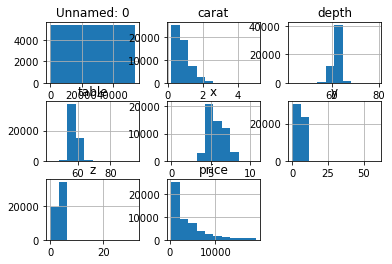

In [31]:
# data distribution (numerical & catagorical) 
df.hist()
df.value_counts()

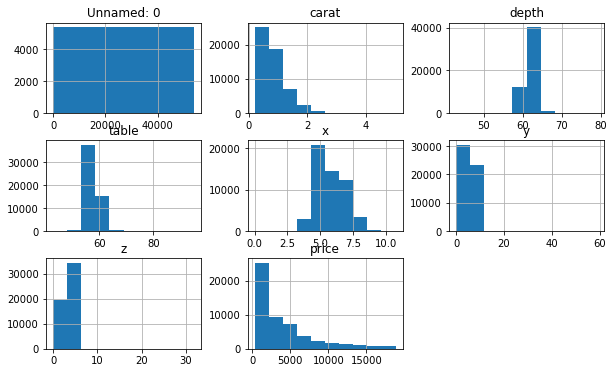

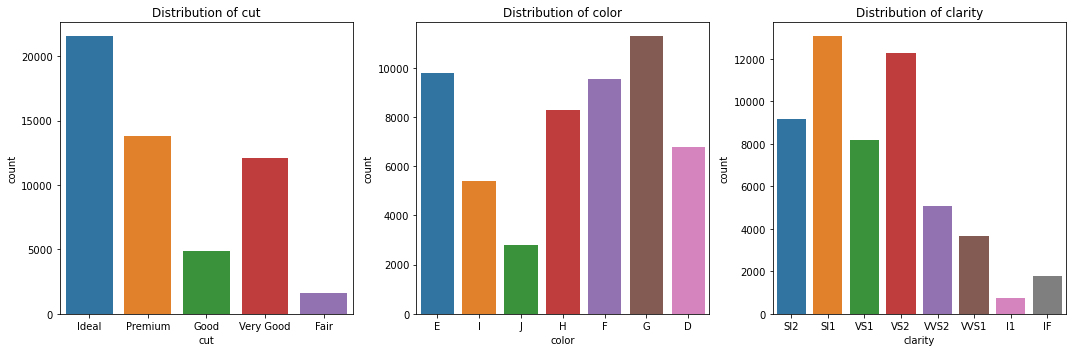

In [42]:
# checking data distribution
# numerical data distribution (histogram)
df.hist(figsize=(10, 6))
plt.show()

# categorical data distribution (value counts)
categorical_columns = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

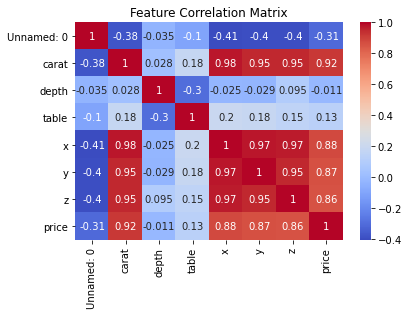

In [39]:
# finding correlations 
# calculate correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

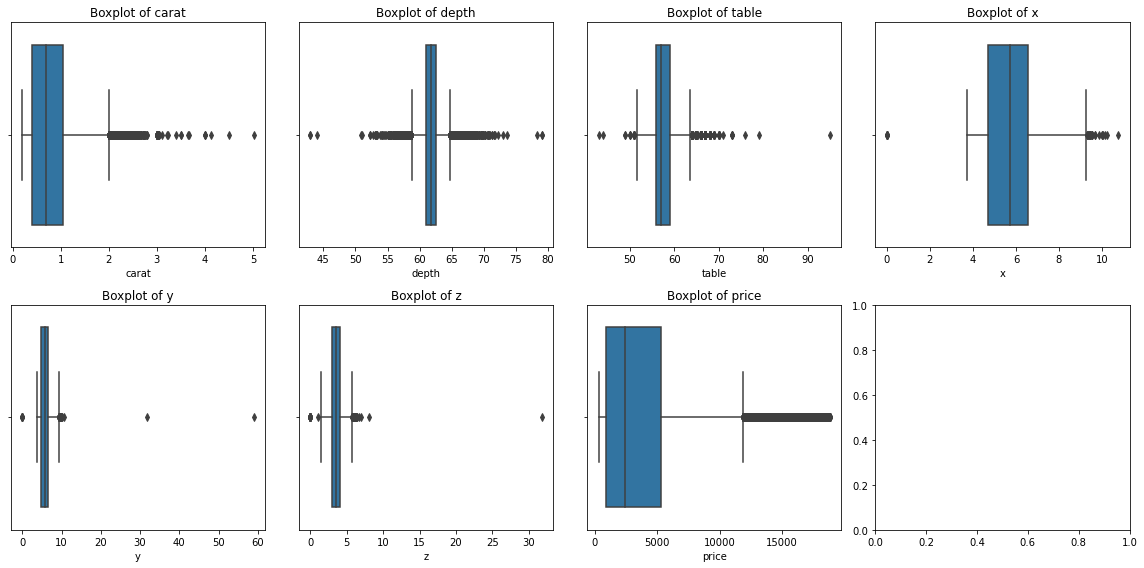

In [55]:
# checking for outliers
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

for ax, category in zip(axs.flatten(), numerical_columns):
    sns.boxplot(x=df[category], ax=ax)
    ax.set_title(f'Boxplot of {category}')

plt.tight_layout()
plt.show()

In [38]:
# checking data types of catagories
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

### Preprocessing data

When performing preprocessing these are the usual steps:
* Handle Missing Values
* Convert Data Types
* 
* 
* 
* 
* 